# **Aufgabe 1**
#### *Gruppe AC*
**Teilaufgabe 1**  
a) Intuitionen für Dropout: <br>
Bei der Anwendung von neuronalen Netzen besteht stets das Risiko, dass die Ausgabe fehlerhaft ist. Statt mehrere neuronale Netze zu trainieren und die häufigste Ausgabe als die richtige Ausgabe zu wählen, ist die Idee von Dropout je Trainingsdurchlauf zufällig Neuronen auszublenden, sodass deren Gewichte und Biase nicht angepasst werden. Die Ausgabe dieses einen Netzes soll nach der Trainingsphase im weiteren Sinne die Ausgabeverteilung mehrerer Netze wiedergeben. 
<br><br>
b) Faktor,um die erhöhte Anzahl aktiver Neuronen zu kompensieren: $\frac{3}{2}$ <br>

**Teilaufgabe 2**

In [32]:
import pickle
import numpy as np
import keras
from keras import layers, optimizers
import matplotlib.pyplot as plt

In [33]:
#Daten laden
data = pickle.load(open('data.pickle', 'rb'))
input = np.reshape(data[:,0], (data.shape[0], -1))
T = np.reshape(data[:,1], (data.shape[0], -1))

In [34]:
def train_network(dropout_rate):
    
    model = keras.Sequential()
    model.add(layers.Dense(100, activation = 'elu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(100, activation = 'elu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1))
    
    model.compile(optimizer = optimizers.Adam(lr = 0.02), loss = 'mean_squared_error')

    model.fit(input, T, epochs = 3000, verbose = 0)
    
    return model

In [35]:
#Trainiere Netzwerke mit verschiedenen Dropout Raten
network0 = train_network(0)
network03 = train_network(0.3)

In [36]:
#Berechne Ausgabe für diskrete Eingabedaten
x = np.linspace(-2, 2, num = 41, endpoint = True)
output0 = network0.predict(x)
output03 = network03.predict(x)

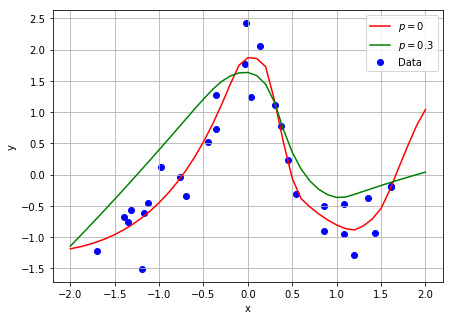

In [53]:
#Plot
plt.figure(figsize=(7,5))
plt.scatter(input, T, c = 'b', label = 'Data')
plt.plot(x, output0, c = 'r', label = '$p = 0$')
plt.plot(x, output03, c = 'g', label = '$p = 0.3$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

**Teilaufgabe 3**

a)

In [38]:
#Extrahiere Gewichte und Bias
W1 = network03.layers[0].get_weights()[0]
B1 = network03.layers[0].get_weights()[1]

W2 = network03.layers[2].get_weights()[0]
B2 = network03.layers[2].get_weights()[1]

W3 = network03.layers[4].get_weights()[0]
B3 = network03.layers[4].get_weights()[1]

In [39]:
def act(X):
    alpha = 0.2
    
    res = np.zeros(np.shape(X))
    for i in range(np.shape(X)[0]):
        for j in range(np.shape(X)[1]):
            if X[i][j] > 0:
                res[i][j] = X[i][j]
            else:
                res[i][j] = alpha * (np.exp(X[i][j]) - 1)
    
    return res

In [40]:
def dropout(X):
    p = 0.3
    
    ncols = np.shape(X)[1]
    cols = np.random.randint(0, np.shape(X)[1], int(ncols*p))
    
    for c in cols:
        for i in range(np.shape(X)[0]):
            X[i][c] = 0
    
    return X

In [41]:
def forward(X):
    
    Y1 = dropout(act(np.dot(X, W1) + B1))
    Y2 = dropout(act(np.dot(Y1, W2) + B2))
    Y3 = np.dot(Y2, W3) + B3
    
    return Y3

In [42]:
#Berechne Netzwerkausgaben
output = np.zeros([1001, 1000])
X = np.linspace(-5, 5, 1001)
X = np.reshape(X, (1001, -1))
for i in range(1000):
    output[:,i] = np.matrix.flatten(forward(X))

In [45]:
#Berechne Erwartungswert und Standardabweichung
mu = np.zeros(1001)
sigma = np.zeros(1001)

for i in range(1001):
    mu[i] = output[i,:].mean()
    sigma[i] = output[i,:].std()

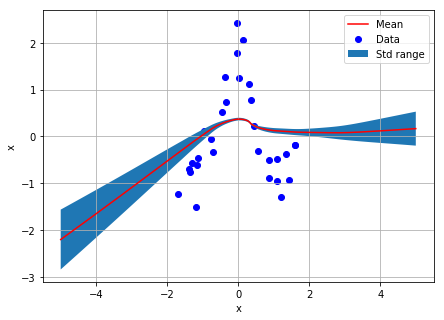

In [52]:
#Plot
plt.figure(figsize=(7,5))
plt.scatter(input, T, c = 'b', label = 'Data')
plt.plot(X, mu, c = 'r', label = 'Mean')
plt.fill_between(X[:,0], mu - sigma, mu + sigma, label = 'Std range')
plt.legend()
plt.xlabel('x')
plt.ylabel('x')
plt.grid()
plt.show()

e) Die Größe des Unsicherheitsbereiches hängt im Wesentlichen davon ab, wie viele Datenpunkte in der Nähe vorhanden waren.

f) Durch Hinzufügen neuer Datenpunkte wird die Unsicherheit in diesem Bereich geringer.